
<img border="0" src="https://www.polytechnique.edu/sites/all/institutionnel/institutpolytechniqueparis_logohorizontal.png" width="90%"> 

<center><h1>Exploring Racism and Sexism in Social Media</h1></center>
<br>
<center>Authors: Saba KIRIAKO, Ashraf GHIYE</center>

# Table of content
1. [Introduction](#Introduction)
2. [Motivation](#Motivation)
3. [Task and Evaluation Metric](#Task-and-Evaluation-Metric)
4. [Data](#Data)  
    4.1 [Data Description](#Data-Description)  
    4.2 [Data Exploration](#Data-Exploration)  
5. [A Simple Model](#A-Simple-Model)
6. [Submission](#Submission)

## Import libraries and dependencies

In [1]:
# !pip install pyspellchecker
# !pip install wordcloud
# !pip -q install sentence-transformers

In [2]:
#Data
import numpy as np
import pandas as pd 

import re
import json 
import string

#NLP
import nltk
from nltk.corpus import stopwords
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

#Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import seaborn as sns

from sentence_transformers import SentenceTransformer
import umap

#Model preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA, FastICA
#Metrics
from sklearn.metrics import confusion_matrix
#Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from gensim.models import Word2Vec

# Introduction

<table style="width:100%; background-color:transparent;">
      <tr style="background-color:transparent;">
            <td style="background-color:transparent;">
                <img src="files/images/ai_social_networks.png" width="600">
            </td>
    </tr>
</table>
<br><br>

**Social media** refers to a wide range of Web sites and Internet-based services that allow users to create content and interact with other users. 

In recent years, online social networking has revolutionized interpersonal communication. It was the reason that newer research on language analysis in social media has been increasingly focusing on the latter's impact on our daily lives, both on a personal and a professional level. 

Some of these tools, such as multi-party chats, discussion forums, blogs, and online reviews, have been the focus of natural language processing research for quite some time now. 

**Natural Language Processing** work has expanded rapidly to cover an immense variety of new social media content: microblogs such as Twitter, social networks such as Facebook, comments on news articles, captions on user-contributed images such as on Flickr, and forums dedicated to specialized topics and needs (e.g., health and online education). Today, NLP has been one of the most promising avenues for social media data processing. 

It is a scientific challenge to develop powerful methods and algorithms which extract relevant information from a large volume of data coming from multiple sources and languages in various formats or free form. 

The challenge nowadays is to use these powerful models and advanced research to solve real-world problems.


# Motivation

<table style="width:100%; background-color:transparent;">
      <tr style="background-color:transparent;">
            <td style="background-color:transparent;">
                <img src="files/images/motivation_header.jpeg" width="500">
            </td>
    </tr>
</table>
<br><br>

> The Internet nowadays is not a safe nor an equal space.

While these websites offer an open space for people to discuss and share thoughts and opinions, their nature and the huge number of posts, comments and messages exchanged makes it almost impossible to control their content. Furthermore, given the different backgrounds, cultures and believes, many people tend to use and aggressive and hateful language when discussing with people who do not share the same backgrounds. 

The rise of hate speech on online forums and social networks has been a significant problem in the age of internet.

Most existing hate speech detection methods, although robust and accurate, focus on hate speech found on social  media, specifically Twitter. 
The context of social media is much more anonymous than the workplace, therefore it tends tolend itself to more aggressive and hostile versions of sexism. 

Therefore, datasets with large amounts of hostile sexism have a slightly easier detection task since hostile sexist statements can hinge on a couple words that, regardless of context, tip the model off that a statement is sexist.

The idea behind this project is to leverage the power of machine learning and NLP to help moderate the content on social media. Twitter is a valuable source of data for the study of sexism and racism itself.  

Moreover, social media is a valuable source for social studies related to agressive and anti-social behavior, in particular sexism and racism; therefore, having a tool to automate the extraction of related tweets from a huge flow of daily tweets will help sociologists to gather useful datasets for monitoring social behavioral shift and evolution in social media platforms.

Some insight about the problem of online harassments through recent statistics.. 

<table style="width:100%; background-color:transparent;">
      <tr style="background-color:transparent;">
            <td style="background-color:transparent;">
                <img src="files/images/Notifications-Hate-Speech.png" width="700">
            </td>
    </tr>
</table>
<br>

[Types of hate content removed from platforms that have signed the EU Code of Conduct (January 2018)](https://www.rcmediafreedom.eu/Dossiers/Hate-speech-what-it-is-and-how-to-contrast-it)

Meanwhile, the biggest platforms are under increasing pressure to beef up their moderating tools, and to make their moderation practices more transparent. 

One underappreciated part of this debate is the human impact that moderation has on the moderators. Many of these individuals spend their days trying to meet numerical quotas, as they sift through beheading videos, violent images, and pornographic content. Some journalists, scholars, and analysts have noted PTSD-like symptoms and other mental health issues arising among moderators. 

Many have called attention to this problem, but few have proposed solutions. Since the human cost of online content moderation is high, automatng this process will yield big profit for social platforms, but only will helps make the internet a safer place for people.

Successful models in detecting hate speech for tweets will have tremendous applications, for example, it can be deployed as browsers' extensions on client's side to offer a safe internet surffing. 

# Task and Evaluation Metric

The objective of this challenge is to correctly label tweets as one of three categories:

- *sexism*: tweets containing traces of prejudice, stereotyping, or discrimination on the basis of sex, typically against women.
- *racism*: tweets containing traces of prejudice, discrimination, or antagonism on the basis of race or ethnicity, typically against minorities or marginalized groups.
- *none*: tweets not containing traces of the above.

This task can be split into two tasks: one main task consisting of detecting the presence of cyberbullying or toxicity traces in tweets and a sub-task consisting of categorizing these detected tweets.  
The reason behind this separated view of tasks will be discussed later in more details.  

The weighted F1-score will be used as a metric (the . It takes values between 0 and 1 where 1 indicates a perfect score and 0 is the lowest score. It's defined as follows:
$$F_1=\frac{\sum_{i=0}^k n_i F_1^i}{\sum_{i=0}^k n_i}$$
where:
- $k$ is the number of classes (3 in our case)
- $n_i$ is the number of samples in class $i$
- $F_1^i$ is the <a href='https://en.wikipedia.org/wiki/F-score'>F1-score</a> of class $i$ viewing the problem as a binary classification (class $i$ vs non class $i$), i.e. the harmonic mean of <a href='https://en.wikipedia.org/wiki/Precision_and_recall'>precision</a> and <a href='https://en.wikipedia.org/wiki/Precision_and_recall'>recall</a>:
$$F_1^i = \frac{2}{(\text{precision}^i)^{-1}+(\text{recall}^i)^{-1}}$$

The training and testing datasets (public and private) will have similar target distributions so that the weights will be similar.

# Data

# Data Description

The dataset is composed of annotated tweets recovered from Twitter using <a href='https://developer.twitter.com/en/docs/twitter-api'>Twitter API</a>. It consists of the following attributes:
- `id`: the tweet's id
- `index`: same as `id`
- `Text`: the tweet's text
- `Annotation`: named labels ('sexism', 'racism' or 'none')
- `oh_label`: indicates if there's a trace of sexism or racism (0 if `Annotation` is None, 1 otherwise)
- `target`: numbered labels (0 for 'none', 1 for sexism, 2 for 'racism')

It's clear that the main (and almost only) attribute is a text that needs a lot of pre-processing using Natural Language Processing tools before applying any classifier.  

It's possible to collect more information (retweets, metadata, user's id...) that may give more context about the tweets using their ids. The following example code can be used to do that (for more information, see <a href='https://developer.twitter.com/en/docs/twitter-api'>Twitter API</a> and <a href='https://www.tweepy.org/'>Tweepy</a>).  

*Note that you should <a href='https://developer.twitter.com/en/apply-for-access'>create a developer account</a> to get access tokens for Twitter API.*

In [3]:
# import tweepy
# import json
# from tweepy.parsers import JSONParser

# # fill with personal access tokens
# consumer_token = ''
# consumer_secret = ''
# access_token = ''
# access_secret = ''

# auth = tweepy.OAuthHandler(consumer_token, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# api = tweepy.API(auth, parser=JSONParser())

# ids = [] # list of twitter ids, limited to 100 ids per call
# tweets = api.statuses_lookup(id_=ids)

# Data Exploration

Let us load the data using this function.

the dataset a `.csv` file containing ~16k tweets, placed in `data` folder.

In [4]:
def build_path(file_name, data_path = './data', file_type='.csv'):
    return "{0}/{1}{2}".format(data_path, file_name, file_type)

data_set = 'train'

In [5]:
df = pd.read_csv(build_path(data_set, './data', '.csv'))

We need to explore the schema of the dataset

In [6]:
df_columns = df.columns
df_columns

Index(['Unnamed: 0', 'index', 'id', 'Text', 'Annotation', 'oh_label',
       'target'],
      dtype='object')

In [7]:
#There are three nan values in 'oh_label', we will drop them here
df = df.dropna()
df['target'].unique() 

array([0, 2, 1])

In [8]:
print("There are {0} labels in annotation.".format(len(df['Annotation'].unique())))

print(df['Annotation'].unique())

There are 3 labels in annotation.
['none' 'racism' 'sexism']


In [9]:
labels, labels_frequency = np.unique(df['Annotation'], return_counts = True)

Here is the first 5 entries in the dataset

In [10]:
df.head(5)

,Unnamed: 0,index,id,Text,Annotation,oh_label,target
0,3798,5.667283e+17,5.667283e+17,WHAT THE SHIT http://t.co/ja2UbCspO3,none,0,0
1,16198,5.749896e+17,5.749896e+17,@halalflaws @haroonstyles @AMohedin @islamdefe...,racism,1,2
2,7978,5.615745e+17,5.615745e+17,RT @RKHayer: http://t.co/YYbYRD98OO massive at...,none,0,0
3,3408,5.708206e+17,5.708206e+17,@tpstigers as someone that went from ~4k follo...,none,0,0
4,13714,5.670680e+17,5.670680e+17,@amyvdh i'm a little jealous. I love the snow.,none,0,0


We will drop the first two columns, since they do not import useful information for our task.

We will only keep the tweet body `text` column, which will be the input for our model, and we will have different labels for each task:

- `none`: no hate speech trace.
- `racism`: the tweet contains racism trace.
- `sexism`: the tweet contains sexism trace.

`oh_label` is a binary feature, which has the value of 0 if no hate speech trace is found (i.e. annotation is none) and 1 if there is a racism or a sexism trace that is found (i.e. annotation is sexism or racism).

In [11]:
df = df.drop(['index','id'], axis=1)
df['oh_label'] = df['target'].astype(int) #binary labels
df['Text']= df['Text'].map(str) #text as string

In [12]:
print("There are {0} tweets which does contain sexism/racism trace.".format(np.sum(df.target>0)))
print("There are {0} tweets does not have hate speech traces.".format(np.sum(df.oh_label==0)))

There are 4010 tweets which does contain sexism/racism trace.
There are 8626 tweets does not have hate speech traces.


Clearly, we can see that the dataset is unbalanced, which reflects real-life, because hate speech is rare cases in real life.

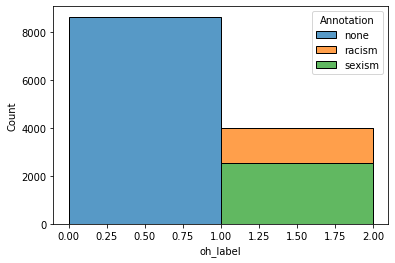

In [13]:
graph = sns.histplot(data = df, x='oh_label', hue='Annotation', multiple='stack', bins=2);

Class distribution

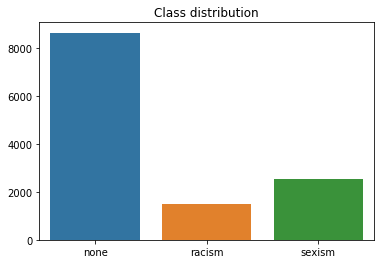

In [14]:
plt.figure()
graph = sns.barplot(data = df, x= labels, y = labels_frequency)
plt.title('Class distribution')
plt.show()

Let us now seperate the features and labels.

As we've seen in model approach, there are many ways to solve these problem:

1- Either by doing two subsequent classifiers (one to detect if there is a hate speech or not, i.e. detecting the 'oh_label') and the second classifier will be trained to detect the two classes of abuse (weither the hate speech was sexism or racism, i.e. detecting the 'annotation').

2- Or, by considering 0's labels in 'oh_label' as a third category or class and do a single classifier to detect weither a tweet has a racism, sexism or neither.

We will go with the second approach now.


In [15]:
X = pd.DataFrame({'tweet': df['Text']})
y = pd.DataFrame({'class': df['target']})

In [16]:
X.shape, y.shape

((12636, 1), (12636, 1))

In [17]:
X.head(5)

,tweet
0,WHAT THE SHIT http://t.co/ja2UbCspO3
1,@halalflaws @haroonstyles @AMohedin @islamdefe...
2,RT @RKHayer: http://t.co/YYbYRD98OO massive at...
3,@tpstigers as someone that went from ~4k follo...
4,@amyvdh i'm a little jealous. I love the snow.


In [18]:
y.head(5)

,class
0,0
1,2
2,0
3,0
4,0


We calculate the embeddings of each tweet using the pretrained model "bert-base-nli-mean-tokens"  from the <a href="https://github.com/UKPLab/sentence-transformers">sentence-transformers</a>-repository. The sentence-transformers repository allows to train and use Transformer models for generating sentence and text embeddings. <a href="https://arxiv.org/abs/1908.10084">Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks</a>

The size of embeddings is 1000, in order to visualise the data, we need to do some dimensionality reduction, we will use umap for this purpose.
UMAP ( Uniform Manifold Approximation and Projection )
<br>
UMAP is a nonlinear dimensionality reduction method, it is very effective for visualizing clusters or groups of data points and their relative proximities.  

From the plot below, we can notice that the categories *sexism* and *racism* can be easily distinguished. This motivates our previous view of the task as a main task and sub-task: a possible approach is to train a model to distinguish between *none* category and the others (binary classifier) and another model to distinguish between *sexism* and *racism*.  

The downside of this approach is that these two models can't share their learned representations.

## Tweets preprocessing

To be able to apply a machine learning task, a very important task in cleaning and preprocessing. And this essential when it comes to an unstructured data like tweets.

We will try to put the steps that are essential to our task, feel free to add more.

Some of the common text preprocessing / cleaning steps are:

- Lower casing
- Removal of Punctuations
-Removal of Stopwords
-Removal of Frequent words
-Stemming
-Lemmatization
-Removal of emoticons
-Conversion of emoticons to words
-Removal of URLs
-Removal of HTML tags
-Chat words conversion
-Spelling correction

We don't have to choose them all, for example in a sentiment analysis we neet to keep the emojis because they contain important information about the sentiment.

Now we will talk about each step and it's importance to our task.

<br>
<br> 

1. <b>Lower Casing</b>

The idea is to convert the input text into same casing format so that 'text', 'Text' and 'TEXT' are treated the same way.

In our case this may not be helpful because UPPER vase may refer to anger ( which may be helpful to predict racism or sexism and so on)

<br>
<br> 

2. <b>Removal of Punctuations</b>

All the punctuation marks according to the priorities should be dealt with. For example: “.”, “,”,”?” are important punctuations that should be retained while others need to be removed. 

For example, the string.punctuation in python contains the following punctuation symbols

!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`

<br>
<br> 

3. <b>Removal of Stopwords</b>

"Stop words” typically refers to the most common words in a language. We would not want these words taking up space in our database. For this using NLTK and using a “Stop Word Dictionary”. <br>
If we are using words count, a stop word will have the high frequency on a corpus. Thus we wont be able to find the most important words in the tweet or text.<br>
Consider words like a, an, the, be etc. These words don’t add any extra information in a sentence

<br>
<br>



4. <b>Removal of Frequent words</b>

if we have a domain specific corpus, we might also have some frequent words which are of not so much importance to us. 

<br>
<br>


6. <b>Stemming</b>

Stemming is the process of reducing derived words to their word stem, base or root form.

As an example, if we have walks and walking, then stemming will stem the suffix to make them walk. 
Other examoke, if we have console and consoling, the stemmer will remove the suffix and make them consol which is not a proper english word.
So we prefer not to use this method because it removes the meaning of the word.

<br>
<br>

7. <b> Lemmatization </b>

Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word belongs to the language.<br>
Lemmatization would be recommended when the meaning of the word is important for analysis which is our case<br>

<br>
<br>

8. <b> Conversion of emoticons to words</b>

In our case we cant remove emoticons because they contain important information about the sentiment. This is why we try to transform them into a word that contain some meaning that will help identify the annotation

<br>
<br>

9. <b> Removal of URLs and HTML tags </b>

Tweets contain a lot of urls and few HTML tags, but they lack of meaning and doesn't have any relation to our problem. So we prefer to remove them.

<br>
<br>

10. <b>Chat Words Conversion</b>

if we have a domain specific corpus, we might also have some frequent words which are of not so much importance to us. And this very frequent in tweets, because people tend to use abbreviations of words instead of the word itself.<br>
So we created our own txt file containing a lot of Chat words found in our dataset.
Example :
  1. "mkr": "ok I hear you"
  2. "rw": "retweet".


<br>
<br>

11. <b> Spelling correction </b>

Anther important step is spelling correction. Typos are common in text data and essentially on twitter and we might want to correct those spelling mistakes before we do our analysis.

<br>
<br>

12. <b>Expanding Contractions </b>

Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe. 
Example:
 1. we’re = we are
 2. we’ve = we have
 3. I’d = I would



## Helper functions

Here are some helper functions to help pre-processing the tweets..


- `dictionary.txt` contains a look-up table to expand contractions.

- `chat_words.txt` contains a look-up table to expand expression and abbreviation used in chats.

Note: Feel free to add other abbrevations based on your pre-assumptions.

In [20]:
#expand contraction sentences, i.e. i'm -> i am
with open('./data/dictionnary.txt') as f: 
    data = f.read() 
    
contraction_dictionary = json.loads(data) 

#remove the abbrevation (chat_words is the abbrevation look-up table)
with open('./data/chat_words.txt') as f: 
    data = f.read() 
    
chat_words_abbrevation = json.loads(data) 
chat_words_abbrevation = set([w for w in chat_words_abbrevation])

def expandContractions(text, c_re):
    """
    function that takes a text as input, with contraction dictionary, and expand the words in text.
    """
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#preprocessing the dictionary to be used by c_re.sub
c_re = re.compile('(%s)' % '|'.join(contraction_dictionary.keys()))

In [21]:
def preprocess_tweet(text):
    """
    Cleaning a tweet with:
        - Lowercase        
        - Removing numbers with regular expressions
        - Removing punctuation with regular expressions
        - Removing other artifacts
        - other operations (feel free to add new one)
    And separate the document into words by simply splitting at spaces
    
    Params:
    -------
        text (string): a tweet as a string
    Returns:
    --------
        tokens (list of strings): the list of tokens (word units) forming the document
    """   
    
    #Check characters to see if they are in punctuation
    REMOVE_PUNCT = re.compile("[.;:!\'?,\"()\[\]]")
    text = REMOVE_PUNCT.sub("", text)

    
    #Join the characters again to form the string.
    text = ''.join(text)
    
    #Removing numbers
    text = re.sub("[0-9]+", "", text)
    
    #convert text to lower-case
    text = text.lower()
    
    #remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)
    text = re.sub(r'http\S+', '', text)
    
    #contractions
    text = expandContractions(text,c_re)
    
    #remove unimportant words
    text = " ".join([word for word in str(text).split() if word not in chat_words_abbrevation])
    
    #remove usernames
    text = re.sub('@[^\s]+', '', text)
    
    # remove the # in #hashtag
    # pass \\1 as a second parameter to keep the hashtag word without the # sign.
    text = re.sub(r'#([^\s]+)', '', text) # \\1
    
    #remove small words (1 and statistique2 characters)
    text = re.sub(r"\b\w{1,3}\b", "", text)

    #remove emoji
    text = remove_emoji(text)
    
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    
    #tokenize
    text = text.split()
    
    #remove stopwords from final word list
    text = [word for word in text if word not in STOP_WORDS]
    
    #lemmatization (idea to try..)
    #emoticons converting (idea to try..)

    return " ".join(text)

Clean all the tweets in the dataframe.

In [22]:
X['clean_tweet'] = X['tweet'].apply(lambda x: preprocess_tweet(x))

In [23]:
for i in range(10):
    print(X['clean_tweet'][i])

shit
islam allows divorce saying divorce times women
massive attacks sign weakness strength
went followers seen huge difference
little jealous love snow
making buckets coffee stop
like hunger games internet protocols
going play ignorant argumentative asshole pretend arabian peninsula
sexist going live losing girl football throwing contest
deconstructed mean rustic good know deconstructed stuff time


In [24]:
def build_wordcloud(array):
  comment_words = '' 
  stopwords = set(STOPWORDS) 
    
  for val in array: 
     
      # typecaste each val to string 
    
      # split the value 
      tokens = val.split() 
        
      # Converts each token into lowercase 
      for i in range(len(tokens)): 
          tokens[i] = tokens[i].lower() 
        
      comment_words += " ".join(tokens)+" "
    
  wordcloud = WordCloud(width = 800, height = 800, 
                  background_color ='white', 
                  stopwords = stopwords, 
                  min_font_size = 10).generate(comment_words) 
    
  # plot the WordCloud image                        
  plt.figure(figsize = (5, 5), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
    
  plt.show() 

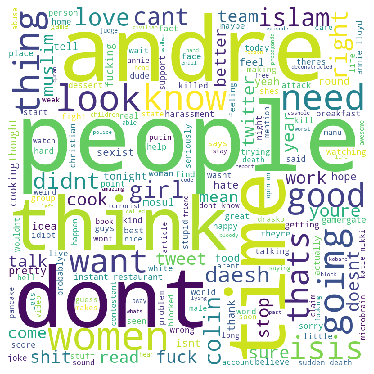

In [25]:
build_wordcloud(X['clean_tweet'].loc[y['class']==0])

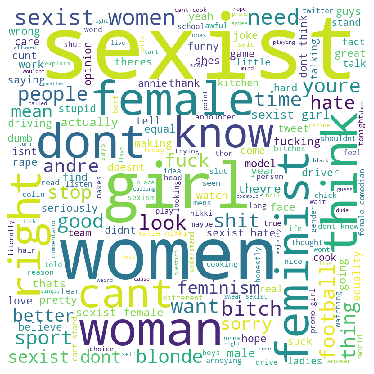

In [26]:
build_wordcloud(X['clean_tweet'].loc[y['class']==1])

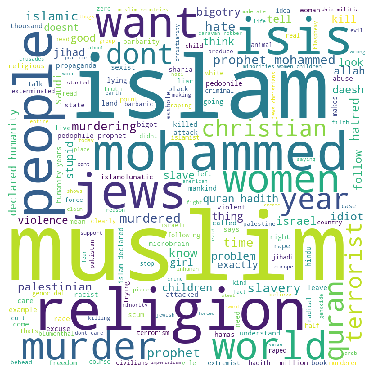

In [27]:
build_wordcloud(X['clean_tweet'].loc[y['class']==2])

# A Simple Model

However, to classify these documents, we can not use all these words.

To have a vector representation for each document, we will have to restraint the size of our vocabulary.
Thus we will construct a vocabulary for our problem based on this dataset

The process of cleaning and tokenizing the texts will done inside the function vocabulary instead of doing it on the whole dataset..

### Helper functions

These functions vectorise each tweet and return and represent it in a set of vocabulary of fixed size.

In [28]:
def count_words(texts):
    """Vectorize text : return count of each word in the text snippets

    Parameters
    ----------
    texts : list of str (The texts)
    Returns
    -------
    vocabulary : dict
        A dictionary that points to an index in counts for each word.
    counts : ndarray, shape (n_samples, n_features)
        The counts of each word in each text.
    """
    
    #set of vocabulary to be learnt
    vocabulary = set()
    #cleaned texts
    words = []
    
    for text in texts[:]:
        words.append(text.split()) #append cleaned text
        vocabulary = vocabulary.union(text.split()) #add new vocabulary
   
    #indexing the vocabulary -> dict
    vocabulary = dict(zip(vocabulary,list(range(len(vocabulary)))))
    
    #preperaing the output matrix: frequency of words (rows: texts, columns: vocabulary)
    counts = np.zeros((len(words), len(vocabulary)), dtype='int32') #accumulator
    

    for i in range(counts.shape[0]):
        #get unique,counts vector for each word in text[i]
        temp = np.unique(words[i], return_counts=True)
        #index these words using vocabulary and remplace their cases with their counts
        counts[i, [vocabulary[word] for word in temp[0]]] = temp[1]
        
    return vocabulary, counts



In [29]:
def vocabulary(corpus, count_threshold=1, voc_threshold=0):
    """    
    Function using word counts to build a vocabulary - can be improved with a second parameter for 
    setting a frequency threshold
    Params:
        corpus (list of strings): corpus of sentences
        count_threshold (int): number of occurences necessary for a word to be included in the vocabulary
        voc_threshold (int): maximum size of the vocabulary 
    Returns:
        vocabulary (dictionary): keys: list of distinct words across the corpus
                                 values: indexes corresponding to each word sorted by frequency   
        vocabulary_word_counts (dictionary): keys: list of distinct words across the corpus
                                             values: corresponding counts of words in the corpus
    """
    ##first part
    Voc, X = count_words(corpus)
    #counting the words
    word_counts = np.sum(X, axis=0)
    
    ##second part
    filtered_word_counts = {} 
    #thresholding the counts
    word_counts_thresholded = np.copy(word_counts)
    word_counts_thresholded[word_counts<count_threshold] = 0
    
    #sort the word_counts in decreasing order
    sorted_indexes = np.argsort(word_counts)[::-1]
    #inverse the key,values in vocab: index -> vocab
    inv_vocab = {v: k for k, v in Voc.items()}
    
    for i in sorted_indexes:
        filtered_word_counts[inv_vocab[i]] = word_counts[i]
    
    
    ##third part
    vocabulary = {}
    vocabulary_word_counts = {}
    count=0
    unkown_count=0
    
    if voc_threshold==0:
        voc_threshold=len(sorted_indexes)
        
    for i in sorted_indexes[:voc_threshold]:
        if word_counts_thresholded[i]!=0:
            #setting a new index of chosed vocabulary
            vocabulary[inv_vocab[i]] = count
            #build new vocabulary after thresholding words less than count_threshold
            vocabulary_word_counts[inv_vocab[i]] = int(filtered_word_counts[inv_vocab[i]])
            #increasing the index
            count+=1
        else:
            #count the word that are thresholded due to count_threshold
            unkown_count+=word_counts[i]
    
    #count the words that where thresholded due to voc_threshold
    vocabulary_word_counts['UNK'] = int(unkown_count + np.sum([word_counts[i] for i in sorted_indexes[voc_threshold:]]))
    vocabulary['UNK'] = count
    
    
    return vocabulary, vocabulary_word_counts

In [30]:
def sentence_representations(texts, vocabulary, embeddings, np_func=np.sum):
    """
    Represent the sentences as a combination of the vector of its words.
    Parameters
    ----------
    texts : a list of sentences   
    vocabulary : dict
        From words to indexes of vector.
    embeddings : Matrix containing word representations
    np_func : function (default: np.sum)
        A numpy matrix operation that can be applied columnwise, 
        like `np.mean`, `np.sum`, or `np.prod`. 
    Returns
    -------
    np.array, dimension `(len(texts), embeddings.shape[1])`            
    """
    
    #preparing output
    representations = np.zeros((len(texts), embeddings.shape[1]))
    
    #we only use these vocabulary
    vocab = list(vocabulary.keys())
    
    for k, text in enumerate(texts):
        
        #for each text in texts
        text = text.split()
        #get the index of words presented in text, by using the vocab_5k indexing
        index_words = np.array([vocabulary[word] for word in text if word in vocab])
        
        #if there exist some words, find an aggregation of them using np_func to produce an embedding vector for the text.
        if(index_words.shape[0] != 0):
            representations[k,:] = np_func(embeddings[index_words], axis=0)
        
    return representations

In [31]:
args_permutation = np.random.permutation(np.arange(len(y)))

In [32]:
#let us split the dataset into X and y

args_permutation = np.random.permutation(np.arange(len(y)))
X = np.array(X['clean_tweet'])[args_permutation]
y = np.array(y, dtype=int)[args_permutation].ravel()

In [33]:
#we'll work on a subsampled data, however the problem of class unbalance is left to the reader..

class_1_mask = np.where(y == 0)[0]
class_2_mask = np.where(y == 1)[0]
class_3_mask = np.where(y == 2)[0]

X_1, y_1 = X[class_1_mask], y[class_1_mask]
X_2, y_2 = X[class_2_mask], y[class_2_mask]
X_3, y_3 = X[class_3_mask], y[class_3_mask]

X_subsampled = np.concatenate((X_1[:1200], X_2[:1200], X_3[:1200]), axis=0)
y_subsampled = np.concatenate((y_1[:1200], y_2[:1200], y_3[:1200]), axis=0)

X_subsampled.shape, y_subsampled.shape

((3600,), (3600,))

In [34]:
np.unique(y_subsampled, return_counts=True)

(array([0, 1, 2]), array([1200, 1200, 1200]))

In [35]:
%%time
vocab_3k, word_counts_3k = vocabulary(X, 0, 2000)

CPU times: user 3.46 s, sys: 132 ms, total: 3.6 s
Wall time: 3.6 s


Now, before using any classification, we will have to get a representation for each document.

We could have used the TF-IDF or other type of representation, however, we will use the Word2Vec embedding to get a densified representation of each case. Then we can apply any classifier on this vectors that represent our documents.

In [36]:
# Creates the Word2Vec model with the relevant parameters
model = Word2Vec(size=300,
                 window=5,
                 iter=30)

# Get the vocabulary from the counts we created earlier
model.build_vocab_from_freq(word_counts_3k)

In [37]:
def preprocess_generator(corpus):
    for text in corpus:
        yield text

In [38]:
model.train(preprocess_generator(X), total_examples=10, epochs=30, report_delay=1);

In [39]:
W2VEmbeddings = model.wv.vectors
print(W2VEmbeddings.shape)

(2001, 300)


In [40]:
# word2vec embedding
rep = sentence_representations(X_subsampled, vocab_3k, W2VEmbeddings)

In [41]:
X_train, y_train = rep, y_subsampled

## Training a Classifier

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train[::2], y_train[::2])
y_pred = clf.predict(X_train[1::2]) #predict on the other the other half (odd samples)

confusion_matrix(y_pred, y_train[1::2])

array([[430, 240, 113],
       [ 96, 337,  28],
       [ 74,  23, 459]])

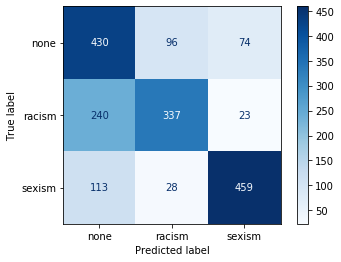

In [43]:
plot_confusion_matrix(clf, X_train[1::2], y_train[1::2],
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 )

In [44]:
skf = StratifiedKFold(n_splits=3)
skf.get_n_splits(X_train, y_train)
scores=[]

for train_index, test_index in skf.split(X_train, y_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = rep[train_index], rep[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    
    scores.append(clf.score(X_test, y_test))

In [45]:
scores
print("score mean: {0}, std:{1}".format(np.mean(scores), np.var(scores)))

score mean: 0.6744444444444445, std:0.0004047839506172825


# Submission

## Test your submission

To submit your code, you can refer to the <a href='https://ramp.studio/events/variable_stars_datacamp2020'>online documentation</a>.  

To test the submission locally:

In [46]:
!ramp_test_submission --submission starting_kit

Testing Exploring Racism and Sexism in Social Media
Reading train and test files from ./data ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
	score  f1_weighted      time
	train         0.55  0.003364
	valid         0.55  0.000118
	test          0.55  0.000070
CV fold 1
	score  f1_weighted      time
	train         0.55  0.002913
	valid         0.55  0.000156
	test          0.55  0.000047
CV fold 2
	score  f1_weighted      time
	train         0.55  0.001747
	valid         0.55  0.000073
	test          0.55  0.000038
CV fold 3
	score  f1_weighted      time
	train         0.55  0.001578
	valid         0.55  0.000069
	test          0.55  0.000037
CV fold 4
	score  f1_weighted      time
	train         0.55  0.001675
	valid         0.55  0.000111
	test          0.55  0.000044
CV fold 5
	score  f1_weighted      time
	train         0.55  0.002066
	valid         0.55  0.000073
	test          0.55  0.000036
CV fold 6
	score  f1_weighted      time
	train         0.55  0.001663
